In [198]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from scipy import stats
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [215]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из  10 пар-индексов вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [216]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    #print(aLength * bLength)
    return np.dot( a, b ) / ( aLength * bLength )

In [217]:
for i in range((len(raitings))):
    cosine_similarity = np.array([cosine(row, raitings[i]) for row in raitings[1:]])
    best_user = np.argmax(cosine_similarity)
    print("Похожие пользователи ", i, best_user)

Похожие пользователи  0 7
Похожие пользователи  1 0
Похожие пользователи  2 1
Похожие пользователи  3 2
Похожие пользователи  4 3
Похожие пользователи  5 4
Похожие пользователи  6 5
Похожие пользователи  7 6
Похожие пользователи  8 7
Похожие пользователи  9 8


b) В реальных задачах фильмов явно не 15, а сотни тысяч и даже миллионы. Также матрицы оценок очень разреженные, поэтому можно хранить сжатые представления для каждого пользователя. Попробуйте сжать признаковое пространство до размерности 5 любым известным вам методом и повторить пункт a) . Проверьте, для скольких пользователей изменился ближайший после такого сжатия.

 Призведем уменьшение размерности до 5 с использование метода главных компонент 

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
XPCAreduced = pca.fit_transform(raitings)

In [219]:
XPCAreduced

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [220]:
for i in range((len(XPCAreduced))):
#     print(XPCAreduced[i])
    cosine_similarity = np.array([cosine(row, XPCAreduced[i]) for row in XPCAreduced[1:]])
#     print(cosine_similarity)
    best_user_pca = np.argmax(cosine_similarity)
    print("Похожие пользователи ", i, best_user_pca)

Похожие пользователи  0 7
Похожие пользователи  1 0
Похожие пользователи  2 1
Похожие пользователи  3 2
Похожие пользователи  4 3
Похожие пользователи  5 4
Похожие пользователи  6 5
Похожие пользователи  7 6
Похожие пользователи  8 7
Похожие пользователи  9 8


### Задание 2
Вычислите производную  $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$  на python и на бумаге (просто подставить точку в производную и ничего не упрощать). Рекомендуется использовать библиотеку sympy для проверки формулы производной, полученной на бумаге. Вычисление производной в точке можно выполнить с помощью sympy или с помощью scipy.misc.derivative.

In [208]:
from sympy import *

Находим производную функции 

In [209]:
x = Symbol('x')
y = tan((sin(x) + cos(2*x + 3)))**2
yprime = y.diff(x)
yprime

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

Вычисляем значение производной в точке х = 1

In [210]:
yx=y.diff(x).subs({x:1})
# print('yx=',yx)
yx

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [211]:
def f(x):
    return  tan((sin(x) + cos(2*x + 3)))**2

In [214]:
from scipy.misc import derivative
derivative(f, 1.0)

57.0653126946030

 ### Задание 3
Часто в реальных задачах случается ситуация, когда необходимо понять, какое распределение и с какими параметрами лучшим образом описывает данные. Ведь поняв, что некоторая метрика хорошо описывается, например, нормальным распределением с параметрами 3 и 8.5 мы можем для быстрых визуализаций и экспериментов хранить всего 2 числа - параметра распределения и название самого распределения вместо гигабайтов самих данных. В этом задании мы решим такую задачу 3-мя разными способами: первые 2 более общие для "подгонки" любых функций и 3-ий для распределений.

In [35]:
from scipy import stats as st

In [90]:
x = np.linspace(-30, 30, 300)
y = [11.642,  9.467,  8.227, 10.372,  8.768,  9.544,  8.202, 10.106,
       10.664, 11.03 , 12.673, 10.445, 12.096, 15.562, 10.55 , 10.81 ,
        8.833, 12.087, 10.463,  9.149,  8.633, 12.233, 10.815, 11.346,
        4.863, 11.602,  9.997, 10.578,  9.097,  8.414, 11.852, 14.262,
        8.527,  5.725,  6.567, 10.767,  4.84 ,  3.433, 11.152, 10.613,
       13.44 ,  7.327,  9.3  , 11.303, 10.732, 10.334, 16.763,  8.541,
       16.307, 10.787, 10.362,  8.362, 11.78 , 13.002,  8.413,  9.334,
       11.631, 11.935,  7.433, 13.87 ,  8.825, 11.377,  6.38 , 11.774,
       13.307,  8.946, 10.171, 11.951,  7.612, 12.916,  6.851,  6.713,
        8.817,  9.485,  9.07 , 10.886, 11.193, 11.707, 10.121, 13.486,
       13.641,  7.749,  6.928, 12.619,  9.498, 10.032,  8.561, 12.907,
       18.546, 10.533, 10.127,  8.875,  9.462, 10.296, 15.635,  9.33 ,
        5.883,  6.671, 11.746, 13.132,  5.702, 12.136,  8.054, 10.632,
       12.995, 10.931, 12.841,  9.757,  9.558, 11.962,  9.997,  8.256,
       14.05 , 11.056,  4.397, 15.013, 10.908,  5.036, 14.101, 11.065,
        6.535,  9.017,  9.327,  8.357, 12.342, 10.808, 10.387,  8.018,
        7.879,  7.686,  5.364, 10.494,  5.518, 13.415,  7.873,  9.122,
       11.167,  7.197, 15.408, 10.881, 11.821, 10.617, 11.34 , 13.319,
       11.407,  7.642, 10.962, 11.6  , 11.243,  6.225, 12.527,  7.485,
        6.367,  5.218,  8.957, 11.71 , 13.981, 11.627, 11.292, 11.07 ,
        7.632, 11.931, 11.732, 10.35 , 14.874, 10.067,  6.804, 12.953,
        9.68 , 10.531,  7.245,  6.795, 14.585,  7.385, 17.949, 13.315,
       11.558,  9.921,  9.27 , 13.003, 11.817,  7.785, 12.956, 11.09 ,
       15.251, 13.163, 10.076, 12.429,  5.511,  8.672,  2.814,  8.762,
       12.139, 10.646, 11.607,  6.45 ,  3.825, 10.043, 10.562,  8.066,
       11.735,  5.764,  8.254, 10.533, 13.903, 12.375, 11.112, 15.186,
       11.619, 12.749,  8.023,  8.477, 10.303,  6.821, 13.099,  7.954,
       10.672,  7.655,  3.747, 14.4  , 10.428,  6.976,  8.336, 13.423,
        7.458, 13.031, 11.287,  9.101, 10.941, 17.224, 10.406, 10.363,
       16.617, 11.836, 12.659, 12.633, 14.962,  6.785,  5.254,  4.079,
       12.576, 12.682, 12.992, 10.544, 11.365,  7.373, 14.686,  7.201,
       14.893, 12.19 ,  9.647,  9.463, 11.616,  7.891,  8.553,  8.555,
        5.347, 11.246, 15.385,  8.883, 11.999, 10.675,  8.107, 12.795,
       13.337,  9.084, 11.664, 11.509,  8.589, 14.145, 10.385, 16.605,
        6.097,  6.718, 11.883,  5.8  ,  8.964,  8.118, 10.759, 13.492,
        9.573, 12.696, 10.075, 11.065, 14.588,  6.215, 13.786,  7.367,
       12.094, 10.403, 10.923, 13.554, 11.057,  8.593, 16.848,  7.137,
        8.549,  8.899, 11.641, 12.491]

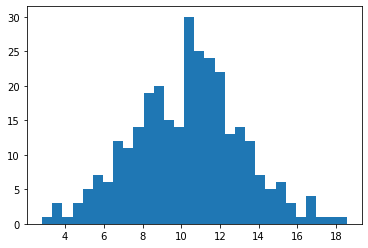

In [71]:
plt.hist(y, bins=30)
plt.show()

В библиотеке scipy.stats есть список непрерывных распределений и у каждого из них есть метод fit(data), позволяющий найти наилучшие параметры распределения по данным. Вам необходимо выбрать подходящее, на ваш взгляд, распределение и найти к нему оптимальные параметры с помощью метода fit(x).

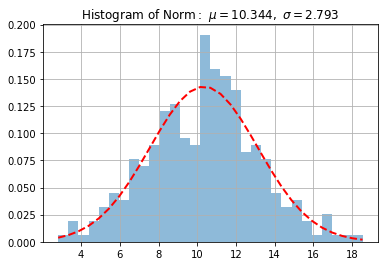

In [107]:
_,bins, _= plt.hist(y, 30, density=1, alpha=0.5)
mu, sigma = st.norm.fit(y)
best_fit_line = st.norm.pdf(bins, mu, sigma)
plt.title(r'$\mathrm{Histogram\ of\ Norm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.plot(bins, best_fit_line, 'r--', linewidth=2)

### Задание 4
Наверняка вы когда-то слышали про такое понятие, как A/B тесты, а если нет, вот неплохая вводная статья по ним. В этом задании мы поймём, как пройденное понятие Центральной предельной теоремы связано с таким важным прикладным инструментом, как A/B тестирование.

Пусть для одной группы пользователей мы показываем 1-ый тип дизайна сайта, а для другой группы 2-ой. Траты пользователей первой группы генерируются случайной величиной rv1, траты пользователей второй группы - rv2. Поэкспериментируйте с количеством пользователей, размерами выборок (как в ЦПТ) и постройте гистограммы средних. Проанализируйте, когда визуально разница становится заметной. Этот механизм применяется в реальных задачах, но решение о разнице происходит по результатам статистических тестов (они не входили в программу нашего курса, но очень рекомендую о них прочитать).

In [148]:
rv1 = norm(loc=105, scale=2)
rv2 = norm(loc=102, scale=3)

Создадим выборки по 100 пользователей

In [190]:
group1=rv1.rvs(100)
group2=rv2.rvs(100)
print(group1.mean(), group1.std())
print(group2.mean(), group2.std())

104.95859967094403 2.1240004480667416
101.77583854957633 2.794953864773396


<AxesSubplot:ylabel='Count'>

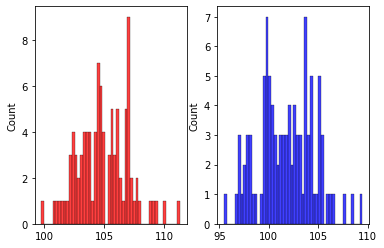

In [191]:
fig, axes = plt.subplots(1, 2)
sns.histplot(group1,bins=50,color='Red',ax=axes[0])
sns.histplot(group2,bins=50,color='Blue', ax=axes[1])

Увеличим размер выборки до 3000

104.9648972980448 1.9513469496526004
102.02573576307029 2.981235498913967


<AxesSubplot:ylabel='Count'>

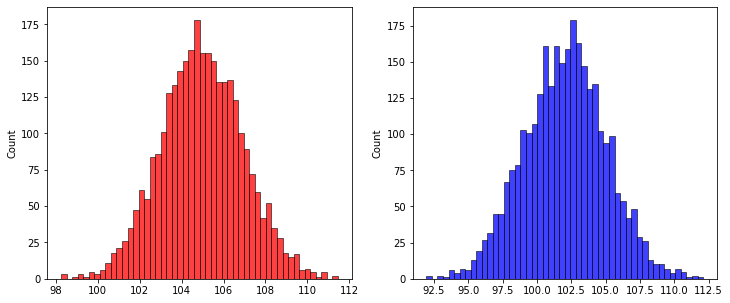

In [192]:
group1=rv1.rvs(3000)
group2=rv2.rvs(3000)
print(group1.mean(), group1.std())
print(group2.mean(), group2.std())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))
sns.histplot(group1,bins=50,color='Red',ax=axes[0])
sns.histplot(group2,bins=50,color='Blue', ax=axes[1])

При увеличении размера выборки, результаты стремятся к более нормальному распределению

In [194]:
group1=rv1.rvs(3000)
group2=rv2.rvs(3000)

Визуально результаты почти одинаковые - проверим это!

В следствие того, что сравниваем две выборки и необходимо определить в чью сторону перевес, будем использовать двухвыборочный двухсторонний критерий Т - Стьюдента.

Формулируем нулевую гипотезу.  
Н0: Средние результаты тестирования групп одинаковые.    
Н1: Средние результаты тестирования групп различаются.  

Уровень статистической значимости Alpha за неимением других данных будем принимать 0.05


In [224]:
res_test = stats.ttest_ind(group1, group2, equal_var=False)

print(group1.mean())
print(group2.mean())

print(res_test)
print()

if (res_test.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, результаты тестирования групп не одинаковые')
else:
    print('Не отвергаем нулевую гипотезу')

104.98676044372257
101.96657249150068
Ttest_indResult(statistic=45.59990577194431, pvalue=0.0)

Отвергаем нулевую гипотезу, результаты тестирования групп не одинаковые


По результатам теста получаем, что в среднем результаты тестирования Группы1 выше. И с учетом P-value меньше Альфа эта разница статистически значима. А значит отвергаем нулевую гипотезу - Результаты тестирования групп не одинаковые !

 ### Задание 5
Вычислите собственные значения и собственные вектора матрицы с помощью функции python и по алгоритму (на бумаге или в latex прямо в ноутбуке):

In [227]:
A = [[-1, -6], 
     [2, 6]]

In [243]:
v, w = np.linalg.eig(A)

In [244]:
print('Собственные значения: ', v)

Собственные значения:  [2. 3.]


In [245]:
print('Собственные векторы: ', w)

Собственные векторы:  [[-0.89442719  0.83205029]
 [ 0.4472136  -0.5547002 ]]


In [246]:
res1 = np.linalg.eig(A)
res2 = np.transpose(res1[1])

In [247]:
res2

array([[-0.89442719,  0.4472136 ],
       [ 0.83205029, -0.5547002 ]])

In [248]:
res2[0] / 0.4472136

array([-1.99999998,  0.99999999])

In [249]:
res2[1] / -0.5547002

array([-1.49999999,  0.99999999])

### Задание 6
Представим, что мы живём в параллельной вселенной, где существуют монетки с тремя гранями. При подбрасывании монетки выпадение 1-ой грани происходит с вероятностью 0.2, 2-ой грани - 0.5, 3-ей грани - 0.3. Какова вероятность при 4-х подбрасываниях увидеть все 3 грани (подбрасывания осуществляются независимо друг от друга)?

Решение для данного задания можно посчитать явно, но также можно запустить процесс симуляции, который с довольно небольшой погрешностью даст правильный ответ.

Расчитаем вероятность когда за 3 броска каждая каждая грань выпадет все три раза 
Суммируем и получим общую вероятность для всех граней.
Находим разницу с 1 для получения противоположенного результата
Ответ: 0,84

In [262]:
a = 0.2**3
b= 0.5**3
c = 0.3**3

In [264]:
t = a + b + c
1 - t

0.84